## Leitura de uma base de imagens na forma
* base/
    * treino/
        * classes/...
            * imagens/...
    * teste/
        * classes/...
            * imagens/...

#### Será salva no formato
[matriz, numero da classe, nome da pasta onde a imagem esta salva (nome da classe)]

In [230]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle
import os
import pathlib

from PIL import Image

def expand2square(rgb_img, background_color=(0, 0, 0)):
    '''fill the with the background_color (grayscale take the mean) to have height = width'''
    pil_img = Image.fromarray(rgb_img)

    if pil_img.mode == 'L':
        background_color = int(
            (background_color[0] + background_color[1] + background_color[2])/3)

    elif pil_img.mode == 'RGB':
        pass

    else:
        raise Exception("No Grayscale or RGB identified")

    width, height = pil_img.size

    if width == height:
        return rgb_img

    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return np.asarray(result)

    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return np.asarray(result)

def detect_faces(img):
    
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces_detected = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)

    if len(faces_detected) > 0:
        (x, y, w, h) = faces_detected[0]
        print(len(faces_detected))

        #img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)

        p=3 #padding, margem
        img = img[y-p+1:y+h+p, x-p+1:x+w+p]

        #img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        #plt.imshow(img_rgb, cmap='gray')
        #plt.show()
    else:
        print("Nenhuma face detectada")
    return img

In [231]:
#DATADIR = "../bases/dados/imagens/mnist/train"
DATADIR = "../../../_DATA_/image/yale"

DATADIR = pathlib.Path(DATADIR)

#IMG_SIZE = 28#'original'#Tamanho mxm e original
IMG_SIZE = 150#'original'#Tamanho mxm e original

formato = 'jpg'

#nome_saida = "mnist-train-2"
nome_saida = "faces-yale"

#local_saida = "../bases/pickle/imagens/mnist/"
local_saida = "../../../_DATA_/image/pickle/"

In [232]:
CATEGORIES = os.listdir(DATADIR)
CATEGORIES.sort()

try:
    CATEGORIES.remove('.ipynb_checkpoints')
except:
    pass
print(CATEGORIES)

['1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6', '7', '8', '9']


In [233]:
SIZE_OF_DATASET = len(list(DATADIR.glob('*/*.'+formato)))

print("Number of training images: ",SIZE_OF_DATASET)

Number of training images:  0


In [234]:
def prep_data(DATA_DIR, CATEGORIES, IMG_SIZE):
    data = []
    for category in CATEGORIES:
        i=0
        path = os.path.join(DATA_DIR,category)
        class_num = CATEGORIES.index(category)#############

        for img in tqdm(os.listdir(path)):

#            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
            img_array = cv2.imread(os.path.join(path,img) ,cv2.cv2.IMREAD_COLOR)
            
            img_array = expand2square(img_array)
            
            #******************APLICAR PRE-PROCESSAMENTO***************
            
            if IMG_SIZE == 'original':
                pass
            else:
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

            #img_array = detect_faces(img_array)

            #if IMG_SIZE == 'original':
            #    pass
            #else:
            #    pass
            #    img_array = cv2.resize(img_array, (150, 150))

            #img_array = equal_hist_p(img_array)

            plt.figure(figsize=(1,1))
            plt.imshow(img_array, cmap='gray')
            plt.show()

            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            data.append([img_array, class_num, category])
            #i=i+1
            #if i >= 100:
            #    break

        plt.figure(figsize=(1,1))
        plt.imshow(img_array, cmap='gray')
        plt.show()
    return data

In [235]:
data = prep_data(DATADIR, CATEGORIES, IMG_SIZE)
print('Number of images: ',len(data))

  0%|          | 0/11 [00:00<?, ?it/s]


AttributeError: 'NoneType' object has no attribute '__array_interface__'

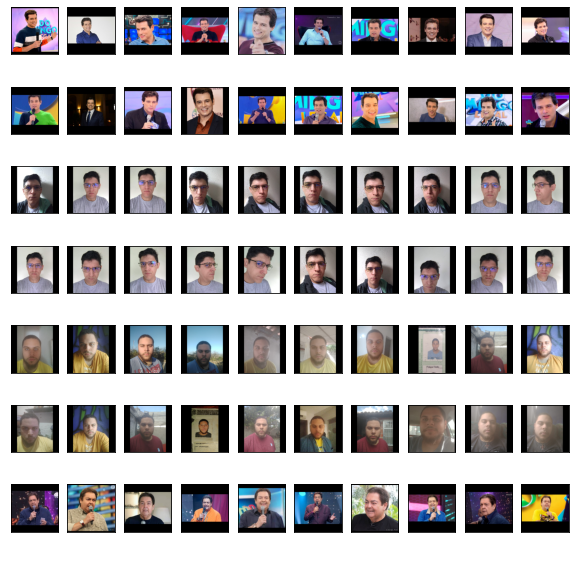

In [ ]:
plt.figure(figsize=(10,10))
m = 70
if( len(data) < 70 ):
    m = len(data)
for i in range(m):
    plt.subplot(7,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i][0], cmap='gray')
    plt.xlabel("{}\n({})".format( data[i][1] , data[i][2] ), color='white')    
plt.show()

In [ ]:
def save_data(save_name, data):
    pickle_out = open(save_name+"-pickle.pickle","wb")
    print('Arquivo gravado como: '+save_name+"-pickle.pickle")
    pickle.dump(data, pickle_out)
    pickle_out.close()

In [ ]:
save_data(local_saida+nome_saida, data)

Arquivo gravado como: ../../../_DATA_/image/pickle/faces-pickle.pickle
